# Chapter 2: Real Zeros of Real Functions

---

## 1. Introduction

A frequent and fundamental problem in science and engineering is finding the **roots** (or **zeros**) of a function. This involves finding a value $x$ such that $f(x) = 0$.

The functions we encounter can be of different types:

1.  **Functions of a single variable ($f: \mathbb{R} \to \mathbb{R}$)**:
    * *Example:* Find $x$ such that $x^2 - 4\sin(x) = 0$.

2.  **Systems of functions ($F: \mathbb{R}^n \to \mathbb{R}^n$)**:
    * *Example:* Find $(x_1, x_2)$ that simultaneously solve:
        $$ \begin{cases} x_1 - x_2 + 0.25 = 0 \\ -x_1^2 + x_2 + 0.25 = 0 \end{cases} $$

For many functions, especially non-linear ones, finding an exact analytical solution is impossible. We must, therefore, turn to **numerical methods** to approximate these roots to a desired level of accuracy.

> **Note:** In this note, we will focus exclusively on finding **real roots** for functions of a single variable. We will not be exploring complex roots.

The process of finding a root is typically divided into two distinct phases.

## 2. The Two Phases of Root Finding

### Phase I: Bracketing (or Isolating) the Roots
The goal of this first phase is to find one or more intervals, $[a, b]$, that are guaranteed to contain at least one root. This narrows down our search space. Common techniques for bracketing include:

1.  **Graphical Analysis**: Plotting the function and visually inspecting where the graph crosses the x-axis.
2.  **Tabulation**: Creating a table of function values and looking for a change in sign between two consecutive points.
3.  **Automated Search**: Fixing a starting point $a$ and systematically searching for a point $b$ such that $f(a) \cdot f(b) < 0$.

This process is mathematically grounded by two important theorems.

#### Key Theorems for Bracketing

**Theorem 1: Intermediate Value Theorem (IVT)**
> If a function $f(x)$ is **continuous** on a closed interval $[a, b]$, and $f(a)$ and $f(b)$ have **opposite signs** (i.e., $f(a) \cdot f(b) < 0$), then there must be at least one value $c$ in $(a, b)$ such that $f(c) = 0$.

This theorem is the cornerstone of root bracketing. It guarantees that if we find a sign change, a root *must* exist within that interval.

**Theorem 2: Uniqueness of a Root**
> If, in addition to the conditions of the IVT, the derivative $f'(x)$ **exists** and **maintains the same sign** (is strictly positive or strictly negative) for all $x$ in $(a, b)$, then the root $c$ is **unique** within that interval.

This second theorem is useful because it tells us if the function is strictly monotonic (always increasing or always decreasing) in the interval. If it is, it can only cross the x-axis once.

### Phase II: Refining the Root

Once we have an interval $[a, b]$ that brackets a root, we move to the refinement phase. The goal here is to use an iterative algorithm to systematically shrink the interval and approximate the root with increasing accuracy.

This is where the various numerical methods come into play. The key differences between them lie in their strategy for refinement, which impacts their speed of convergence and reliability.

In the upcoming notebooks, we will study the following refinement methods:
-   **Bisection Method**
-   **Fixed-Point Iteration Method**
-   **Newton-Raphson Method**
<!-- -   **Secant Method** -->

## 3. Example: Bracketing Roots for $f(x) = x^3 - 9x + 3$

Let's apply the techniques from Phase I to find intervals containing the roots of the function $f(x) = x^3 - 9x + 3$.

### Method 1: Graphical Analysis

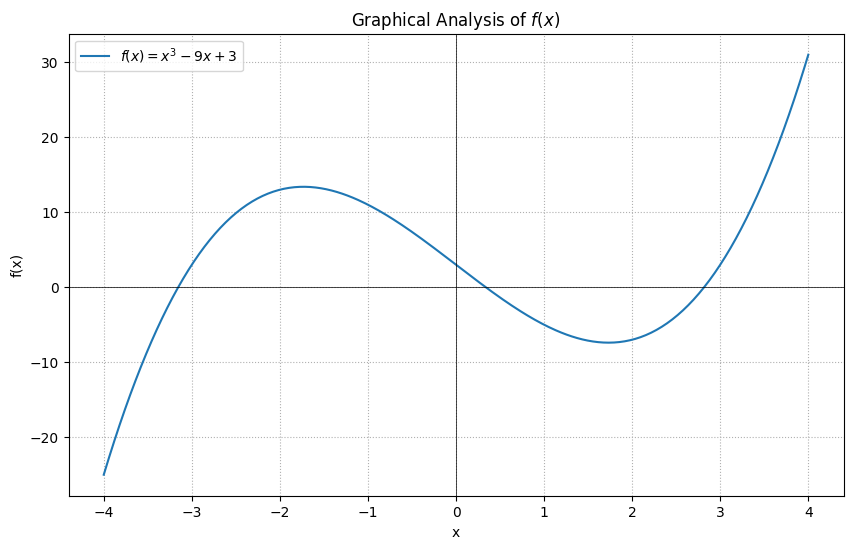

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 9*x + 3

# Generate x values for plotting
x_vals = np.linspace(-4, 4, 400)
y_vals = f(x_vals)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^3 - 9x + 3$')
plt.axhline(0, color='black', linewidth=0.5) # x-axis
plt.axvline(0, color='black', linewidth=0.5) # y-axis
plt.title('Graphical Analysis of $f(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle=':')
plt.legend()
plt.show()

**Visual Inspection:**
From the graph, we can visually identify three intervals where the function crosses the x-axis, suggesting three distinct roots:
1.  One root between **-4 and -3**.
2.  One root between **0 and 1**.
3.  One root between **2 and 3**.

### Method 2: Tabulation and Sign-Change Detection

In [3]:
import pandas as pd

def find_root_intervals(func, start, end, step):
    """Generates a table of values and identifies intervals with sign changes."""
    
    points = np.arange(start, end + step, step)
    f_values = func(points)
    
    # Create a DataFrame for nice display
    df = pd.DataFrame({'x': points, 'f(x)': f_values})
    print("--- Table of Values ---")
    print(df.to_string(index=False))
    
    # Find and print intervals with roots
    print("\n--- Intervals Containing Roots ---")
    for i in range(len(points) - 1):
        # Check if the product of f(x_i) and f(x_{i+1}) is negative
        if f_values[i] * f_values[i+1] < 0:
            print(f"Sign change detected. Root exists in: [{points[i]:.1f}, {points[i+1]:.1f}] -> [f(a)={f_values[i]:.2f}, f(b)={f_values[i+1]:.2f}]")

# Search for roots in the range [-4, 4] with a step of 1
find_root_intervals(f, start=-4, end=4, step=1)

--- Table of Values ---
 x  f(x)
-4   -25
-3     3
-2    13
-1    11
 0     3
 1    -5
 2    -7
 3     3
 4    31

--- Intervals Containing Roots ---
Sign change detected. Root exists in: [-4.0, -3.0] -> [f(a)=-25.00, f(b)=3.00]
Sign change detected. Root exists in: [0.0, 1.0] -> [f(a)=3.00, f(b)=-5.00]
Sign change detected. Root exists in: [2.0, 3.0] -> [f(a)=-7.00, f(b)=3.00]


**Tabulation Results:**
The automated search confirms our graphical analysis. The table clearly shows a change of sign (and therefore, a root) in the following integer intervals:
- **[-4.0, -3.0]**: $f(x)$ goes from -25 to +3.
- **[0.0, 1.0]**: $f(x)$ goes from +3 to -5.
- **[2.0, 3.0]**: $f(x)$ goes from -7 to +3.

With these initial brackets, we are now ready to proceed to Phase II and apply refinement methods to find the roots with high precision.